In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def datapdf(data, xmin=None):
    # Code adapted from powerlaw package:
    # https://github.com/jeffalstott/powerlaw/blob/master/powerlaw.py
    data = np.asarray(data)
    xmax = np.max(data)
    if not xmin:
        xmin = np.min(data)

    if xmin<1:  
        xmax2=xmax/xmin
        xmin2=1
    else:
        xmax2=xmax
        xmin2=xmin

    log_min_size = np.log10(xmin2)
    log_max_size = np.log10(xmax2)
    number_of_bins = int(np.ceil((log_max_size-log_min_size)*10))
    bins=np.unique(
            np.floor(
                np.logspace(
                    log_min_size, log_max_size, num=number_of_bins)))

    if xmin<1: #Needed to include also data x<1 in pdf.
        hist, edges = np.histogram(data/xmin, bins, density=True)
        edges=edges*xmin # transform result back to original
        hist=hist/xmin # rescale hist, so that np.sum(hist*edges)==1
    else:
        hist, edges = np.histogram(data, bins, density=True)
        
    bin_centers = (edges[1:]+edges[:-1])/2.0
    return bin_centers, hist

# Data analysis C++ files output

## Weight distributions

In [4]:
df=pd.read_csv('weights1000sim0.csv',header=None,names=['Source','Target','weight'])
weights1=df['weight'].values
for k in range(1,10):
    df = pd.read_csv('weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights1 = np.concatenate([weights1, df['weight'].values])

In [5]:
df=pd.read_csv('weights1000sim10.csv',header=None,names=['Source','Target','weight'])
weights2=df['weight'].values
for k in range(11,40):
    df = pd.read_csv('weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights2 = np.concatenate([weights2, df['weight'].values])

In [6]:
df=pd.read_csv('weights1000sim40.csv',header=None,names=['Source','Target','weight'])
weights3=df['weight'].values
for k in range(41,70):
    df = pd.read_csv('weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights3 = np.concatenate([weights3, df['weight'].values])

In [7]:
bin_centers1, hist1 = datapdf(weights1)
bin_centers2, hist2 = datapdf(weights2)

In [8]:
bin_centers3, hist3 = datapdf(weights3)

In [9]:
w=np.arange(10,max(weights2)-100)
f=5*w**(-2.5)

In [10]:
hist3[np.where(hist3==0)[0]]=np.nan

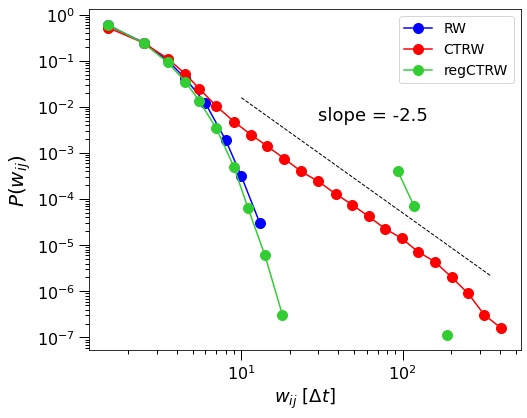

In [11]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.15,top=0.95,bottom=0.16)

plt.loglog(w, f, 'grey', color='k', linestyle='--',linewidth=1)

plt.text(30, 0.005, 'slope = -2.5', fontsize=18, color='k')

plt.loglog(bin_centers1, hist1, color='b', marker='o', markersize=10, label='RW')
#plt.loglog(bin_centers, hist, 'b', linewidth=1)

plt.loglog(bin_centers2, hist2, color='r', marker='o', markersize=10, label='CTRW')
#plt.loglog(bin_centers1, hist1, 'r', linewidth=1)

plt.loglog(bin_centers3, hist3, color='limegreen', marker='o', markersize=10, label='regCTRW')

plt.xlabel(r'$w_{ij}$' + r' $[\Delta t]$', fontsize=18)
plt.ylabel(r'$P(w_{ij})$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')

plt.legend(loc=1,fontsize = 14)

'''plt.savefig('simulation-weights-pdfs-20210825.png')'''

plt.show()

# SE models on RWs

## Continuous-time RWs

In [12]:
T = 500

In [13]:
I=np.zeros(T)
I1=np.zeros(T)

for k in range(30):
    I += np.genfromtxt('rwexposed' + str(k) + '.txt')
for k in range(30,60):
    I1 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I/=30
I1/=30

In [14]:
I2=np.zeros(T)
for k in range(60,90):
    I2 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I2/=30

In [15]:
I3=np.zeros(T)
for k in range(90,120):
    I3 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I3/=30

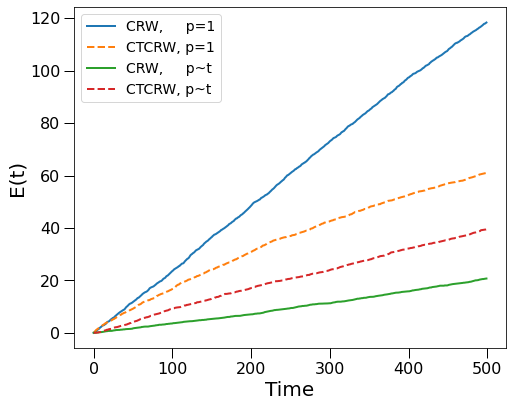

In [16]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.15,top=0.95,bottom=0.16)

plt.plot(I, linewidth=2, label='CRW,     p=1')
plt.plot(I1, linewidth=2, linestyle='--', label='CTCRW, p=1')
plt.plot(I2, linewidth=2, label='CRW,     p~t')
plt.plot(I3, linewidth=2, linestyle='--', label='CTCRW, p~t')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')

plt.xlabel('Time', fontsize=20)
plt.ylabel('E(t)', fontsize=20)

plt.legend(loc=2,fontsize = 14)


'''plt.savefig('simulation-spreadingcurves-RWs-20211112.png')'''

plt.show()

## Regulated RWs

In [17]:
I=np.zeros(T)
I1=np.zeros(T)

for k in range(120,150):
    I += np.genfromtxt('rwexposed' + str(k) + '.txt')
for k in range(150,180):
    I1 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I/=30
I1/=30

I2=np.zeros(T)
for k in range(180,210):
    I2 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I2/=30

I3=np.zeros(T)
for k in range(210,240):
    I3 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I3/=30

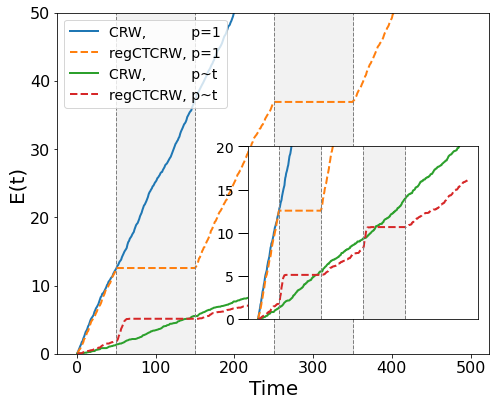

In [18]:
fig, ax1 = plt.subplots(figsize=(8,6))
plt.subplots_adjust(left=0.15,top=0.95,bottom=0.16)

left, bottom, width, height = [0.48, 0.24, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

s=14

## -------------------------------------------------------------------------
ax1.plot(I, linewidth=2,                  label='CRW,          p=1')
ax1.plot(I1, linewidth=2, linestyle='--', label='regCTCRW, p=1')
ax1.plot(I2, linewidth=2,                 label='CRW,          p~t')
ax1.plot(I3, linewidth=2, linestyle='--', label='regCTCRW, p~t')

ax1.axvspan(50,150, alpha=0.1, color='grey')
ax1.axvspan(250,350, alpha=0.1, color='grey')
ax1.axvline(50, color='grey', linestyle='--',linewidth=1)
ax1.axvline(150, color='grey', linestyle='--',linewidth=1)
ax1.axvline(250, color='grey', linestyle='--',linewidth=1)
ax1.axvline(350, color='grey', linestyle='--',linewidth=1)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')


ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('E(t)', fontsize=20)
ax1.tick_params(labelsize=16)

ax1.legend(loc=2,fontsize = 14)

ax1.set_ylim([0,50])

## -------------------------------------------------------------------------

ax2.plot(I, linewidth=2)
ax2.plot(I1, linewidth=2, linestyle='--')
ax2.plot(I2, linewidth=2)
ax2.plot(I3, linewidth=2, linestyle='--')

ax2.axvspan(50,150, alpha=0.1, color='grey')
ax2.axvspan(250,350, alpha=0.1, color='grey')
ax2.axvline(50, color='grey', linestyle='--',linewidth=1)
ax2.axvline(150, color='grey', linestyle='--',linewidth=1)
ax2.axvline(250, color='grey', linestyle='--',linewidth=1)
ax2.axvline(350, color='grey', linestyle='--',linewidth=1)

#ax2.set_yticklabels([])
#ax2.set_xticklabels([])
#for tick in ax2.yaxis.get_major_ticks():
#    tick.label.set_fontsize(s)
ax2.tick_params(labelsize=14)
ax2.tick_params(
    axis='both',         
    which='both',      
    bottom=False, 
    top=False,        
    left=True,
    labelbottom=False,
    labelleft=True)

ax2.set_ylim([0,20])

'''plt.savefig('simulation-spreadingcurves-RWs-20211112-inset.png')'''

plt.show()